<a href="https://colab.research.google.com/github/tekindustr4es/Codigos_matematicas_aplicadas_a_la_ingenieria/blob/main/Actividad_2_inciso_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [ ]:
#url = "https://www.4freephotos.com/medium/2015/Blurry-city-lights-7318.jpg"
url = "https://i.postimg.cc/MHJbvFJ2/francoscu.jpg"
r=requests.get(url)
open('image.jpg','wb').write(r.content)
image=Image.open('image.jpg')
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240 at 0x7F4DA878AA70>


In [ ]:
def convolve(kernel,image):
  weight = sum([sum(row) for row in kernel])
  if weight != 0:
    kernel=[[cell/weight for cell in row] for row in kernel]

  image2 = Image.new("RGB", (image.width, image.height))

  for x in range(1, image.width - 1):
    for y in range(1, image.height - 1):
      newpixel=[0, 0, 0]
      for dx in range(-1, 2):
        for dy in range(-1, 2):
          nearby=image.getpixel((x + dx, y + dy))
          for j in range(3):
            newpixel[j]=newpixel[j] + nearby[j] * kernel[1 + dy][1 + dx]
      newpixel=tuple(map(int, newpixel))
      image2.putpixel((x, y), newpixel)

  return(image2)

In [ ]:
def showtwo(left, right):
  plt.subplot(1, 2, 1)
  plt.imshow(left)
  plt.title("Original" )
  plt.subplot(1, 2, 2)
  plt.imshow(right)
  plt.title("Filtrado" )
  plt.show()

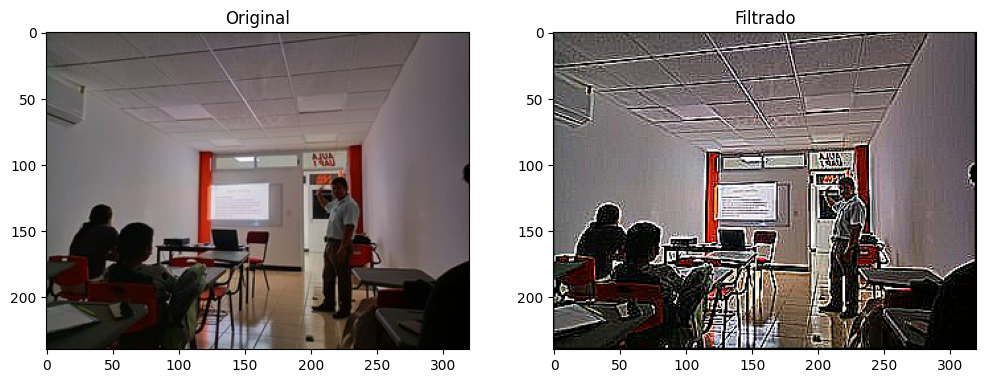

In [ ]:
showtwo(image, convolve([[-1, -1, -1],
                         [-1, 9, -1],
                         [-1, -1, -1]], image))